# BREAST CANCER DETENTION
Breast cancer is a disease in which cells in the breast grow out of control. There are different kinds of breast cancer. The kind of breast cancer depends on which cells in the breast turn into cancer.

Here we will use the "Breast Cancer Wisconsin (Diagnostic) DataSet". This dataset contains 569 patients with breast tumors. Several measurements and a diagnosis of malignant and benign are available for each patient. The measurements will be used as features to make our predictions on the diagnosis.

## Goal of the model

The purpose of this Kernel is to develop a neural network that is capable of accurately predicting whether a tumor is benign or malignant, given several measurements. For this purpose, first we will analyze this dataset and then and to try three diffenet deep learning classification models with and without early stopping and droupout layers and compare the obtained results.

## What is a benign tumor?

Benign tumors aren’t cancerous. They won’t invade surrounding tissue or spread elsewhere.

Even so, they can cause serious problems when they grow near vital organs, press on a nerve, or restrict blood flow. Benign tumors usually respond well to treatment.

## What’s a malignant tumor?

Malignant tumors are cancerous.

Our bodies constantly produce new cells to replace old ones. Sometimes, DNA gets damaged in the process, so new cells develop abnormally. Instead of dying off, they continue to multiply faster than the immune system can handle, forming a tumor.

Cancer cells can break away from tumors and travel through the bloodstream or lymphatic system to other parts of the body.

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

**Importing and Exploring Data**

In [2]:
cancer=pd.read_csv("data.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#no. of Rows and Columns in dataset
cancer.shape

(569, 33)

In [4]:
#checking missing value
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

*Only Unnamed feature has Missing values , we can drop this column*

In [5]:
#Droping Unnamed column
cancer.dropna(axis=1,inplace=True)

In [6]:
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

*we have 357 Bengin cases and 212 Malignat cases which is kinda good, as more people are safe*

C:\Users\abhiw\.conda\envs\cancerpred\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

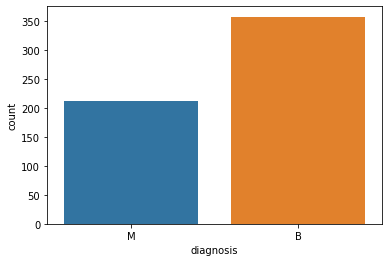

In [7]:
sns.countplot(cancer['diagnosis'],label='count')

In [8]:
#look at the data types to see which columns need to be encoded
cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

1) There is an id that cannot be used for classificaiton

2) Diagnosis is our class label,its categorical dataform we will convert it into numerical caegorical form.

3) Unnamed: 32 feature includes NaN so we do not need it.

4) The remaining featuers are float type so we don't need to covert the data form.

In [9]:
#Encode the categorical values(Diagnosis)
from sklearn.preprocessing import LabelEncoder
encoder_y= LabelEncoder()
cancer.iloc[:,1]=encoder_y.fit_transform(cancer.iloc[:,1].values)
cancer.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

**M=1**

**B=0**

In [10]:
#correlation of the columns
cancer.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


## Visualization

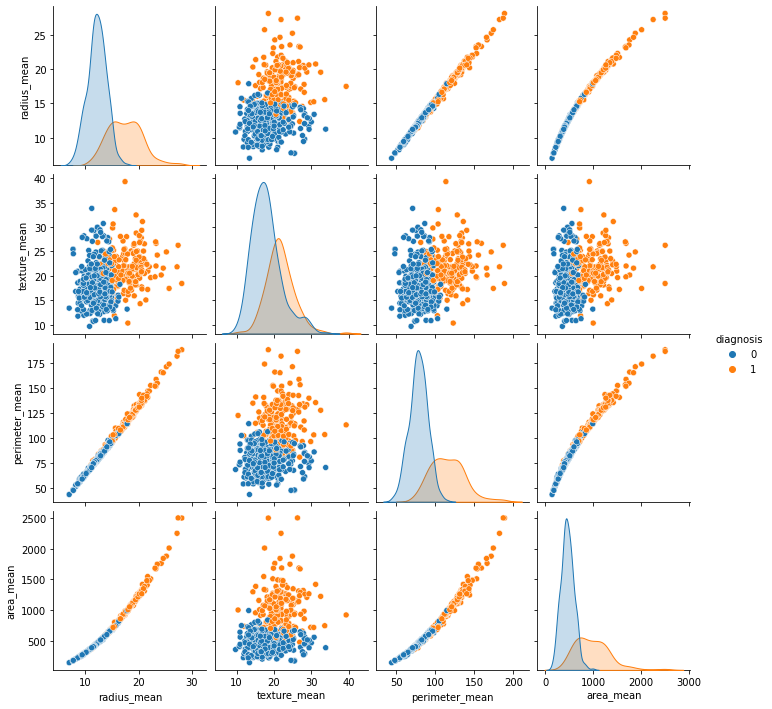

In [11]:
#create pair plot
sns.pairplot(cancer.iloc[:,1:6],hue='diagnosis')

C:\Users\abhiw\.conda\envs\cancerpred\lib\site-packages\seaborn\matrix.py:308: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<AxesSubplot:>

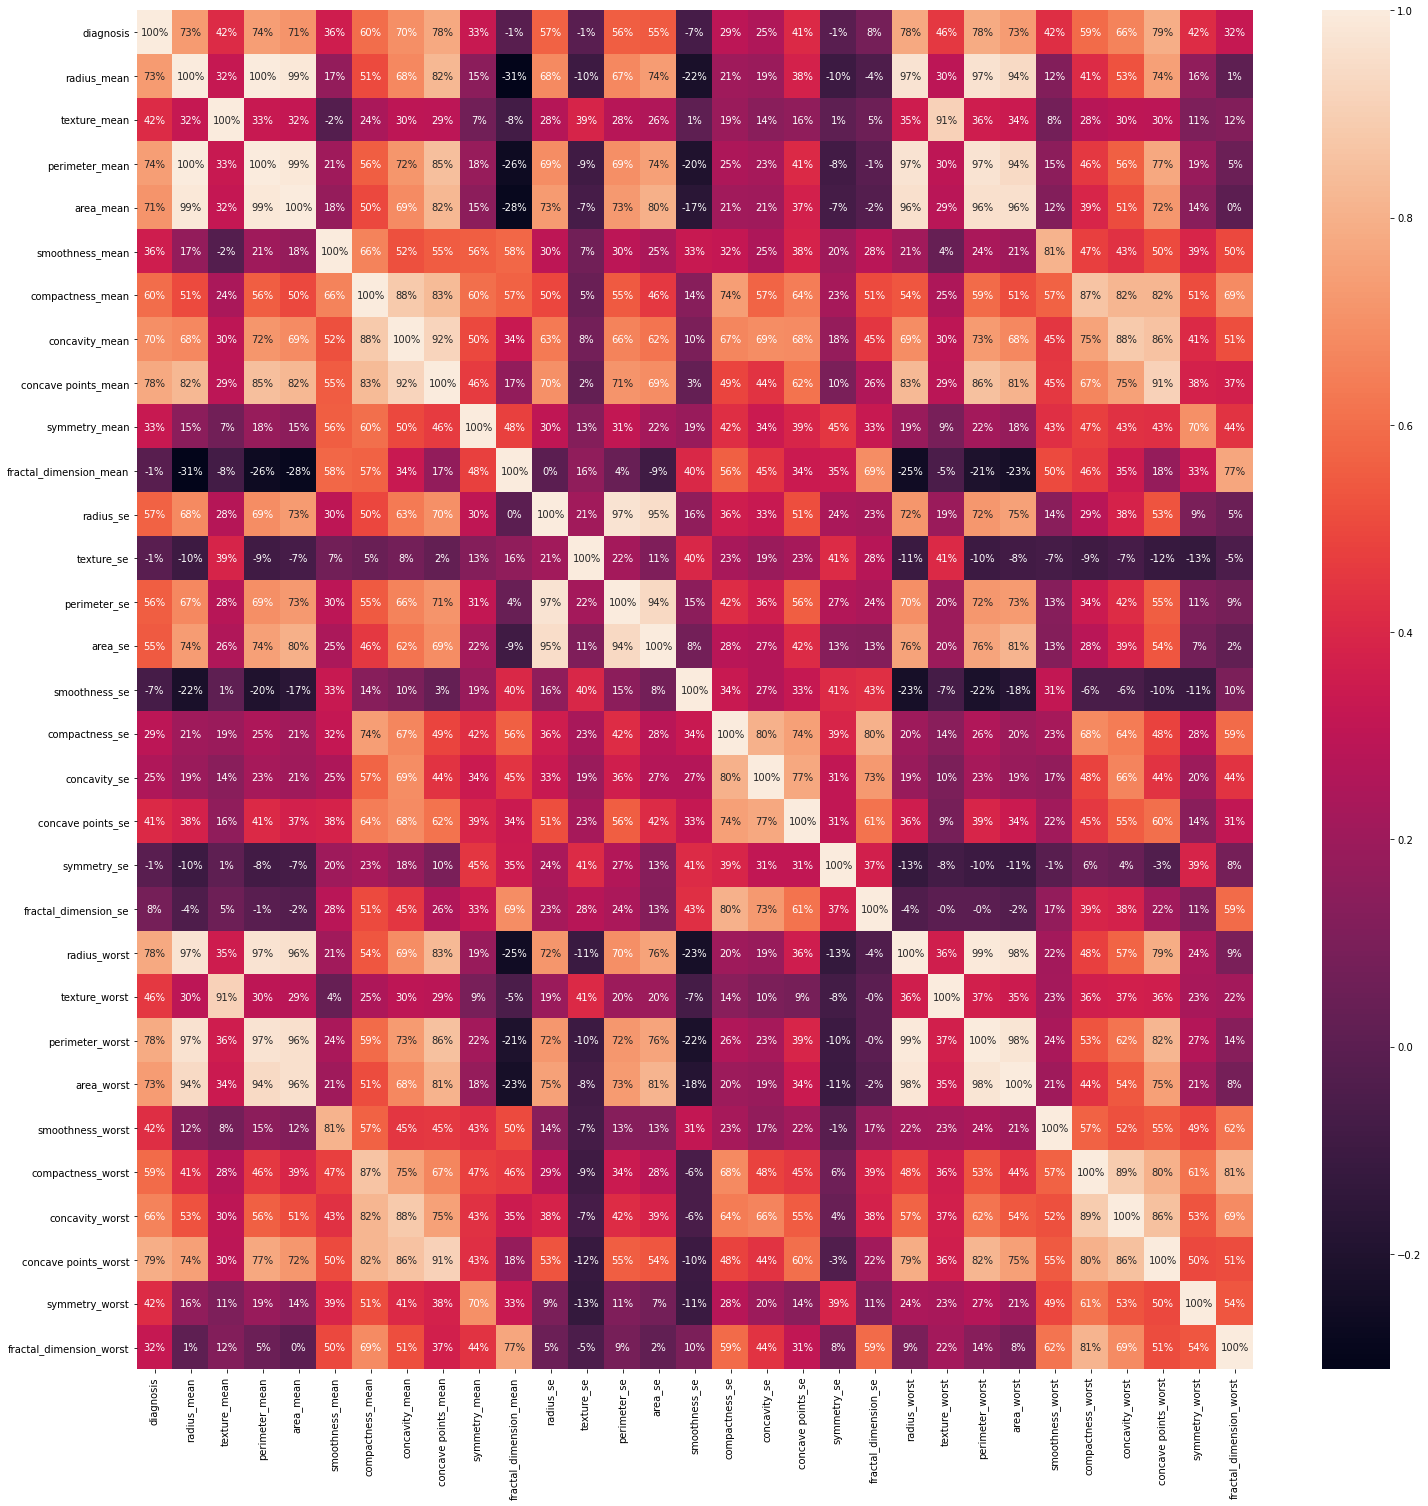

In [12]:
#using heatmap to see the coorelation 
plt.figure(figsize=(25,25))
sns.heatmap(cancer.iloc[:,1:33].corr(),annot=True,Cmap='plasma',fmt='.0%')


**Split the data into independent(X) and dependent(Y) Datasets**

In [13]:
x=cancer.iloc[:,2:32].values
y=cancer['diagnosis'].values


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [16]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


## Model

In [17]:
def models(x_train,y_train):
    
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    m1= LogisticRegression(random_state=0)
    m1.fit(x_train,y_train)
    
    #Decision tree
    from sklearn.tree import DecisionTreeClassifier
    m2=DecisionTreeClassifier(criterion='entropy',random_state=0)
    m2.fit(x_train,y_train)
    
    #Random fores Classifier
    from sklearn.ensemble import RandomForestClassifier
    m3=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    m3.fit(x_train,y_train)
    
    #Accuracy using score model
    print("[0]Logistic Regression Accuracy:",m1.score(x_train,y_train))
    print("[1]Decision Tree Accuracy:",m2.score(x_train,y_train))
    print("[2]Random Forest Accuracy:",m3.score(x_train,y_train))
    
    return m1,m2,m3
    


In [18]:
model_accuracy=models(x_train,y_train)

[0]Logistic Regression Accuracy: 0.9906103286384976
[1]Decision Tree Accuracy: 1.0
[2]Random Forest Accuracy: 0.9976525821596244


*All models did gud, Decision Tree did the best amoung other classifiers*

**Testing Model and calculating accuracy**

In [21]:
for i in range(len(model_accuracy)):
    print('model_accuracy',i)
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,model_accuracy[i].predict(x_test))
    print(cm)
    TP=cm[0][0]
    TN=cm[1][1]
    FN=cm[1][0]
    FP=cm[0][1]

    print('Testing Accuracy=:',(TP+TN)/(TP+TN+FP+FN))
    print()

model_accuracy 0
[[86  4]
 [ 2 51]]
Testing Accuracy=: 0.958041958041958

model_accuracy 1
[[85  5]
 [ 3 50]]
Testing Accuracy=: 0.9440559440559441

model_accuracy 2
[[88  2]
 [ 1 52]]
Testing Accuracy=: 0.9790209790209791



**Prediction Of RF model** 

In [23]:
pred=model_accuracy[2].predict(x_test)
print(pred)
print()
print(y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


<function matplotlib.pyplot.show(close=None, block=None)>

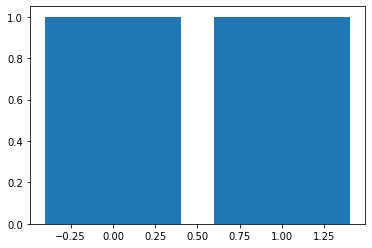

In [24]:
plt.bar(pred,y_test)
plt.show

## Conclusion of model 

I have used 3 classifiers to train the model( logistic regreesion,Decision Tree and Random forest) as we can see that Decison Tree gave the best accuracy but during Testing time Random forest gave the best accuracy, Random forest had LOW BIAS & LOW VARIANCE.
Than i predicted the output using Random Forest classfier, the predicted values were having gud accuracy we can even notice that by ploating bargraph.